# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [3]:
#import libraries first
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Load datasets
iris = load_iris()
iris.keys()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.drop(['sepal length (cm)','sepal width (cm)'] ,axis= 1, inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## <font color = blue> 2. Data Manipulationa and visualization

In [6]:
#visualize your data here
df.isna().sum()

petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


Text(0, 0.5, 'petal width (cm)')

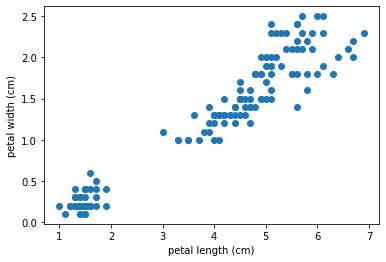

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['petal length (cm)'],df['petal width (cm)'])
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

## <font color = blue> 3. Train model

In [9]:
#train your model here
from sklearn.cluster import KMeans
x = df
Kmean = KMeans(n_clusters= 2)
Kmean.fit(x)

y_Kmeans = Kmean.predict(x)
centers = Kmean.cluster_centers_


## <font color = blue> 4. Explore KMeans attributes

In [10]:
#check Kmean algorithm's attribute
Kmean.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [11]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
Kmean.feature_names_in_

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

In [13]:
Kmean.inertia_

86.39021984551395

In [14]:
Kmean.n_iter_

2

In [15]:
Kmean.n_features_in_

2

## <font color = blue> 5. Prediction

In [16]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
sample_test = np.array([-3.0,-3.0])
second_test = sample_test.reshape(1,-1)


In [17]:
Kmean.predict(second_test)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

## <font color = blue> 6. Plotting clusters with thier centroids

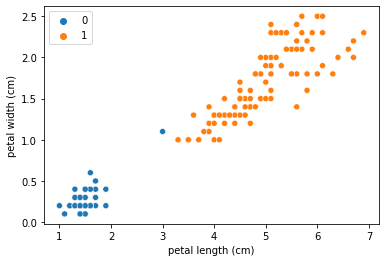

In [18]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
sns.scatterplot(data= df, x='petal length (cm)',y= 'petal width (cm)',hue = Kmean.labels_)
plt.show()

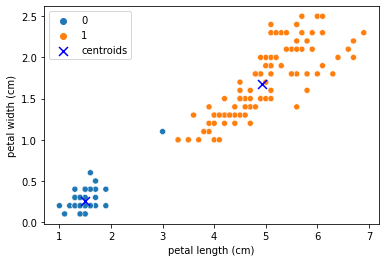

In [23]:
sns.scatterplot(data= df, x='petal length (cm)',y= 'petal width (cm)',hue = Kmean.labels_)
plt.scatter(Kmean.cluster_centers_[:,0],Kmean.cluster_centers_[:,1], marker = 'x', c ='b',s=80,label='centroids')
plt.legend()
plt.show()

## <font color = blue> 7. Use elbow method to choose K for Kmean

In [21]:
# plot grah to decide K value for given dataset.
# plot grah to decide K value for given dataset.
distortions = []
K = range(1,4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)



C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


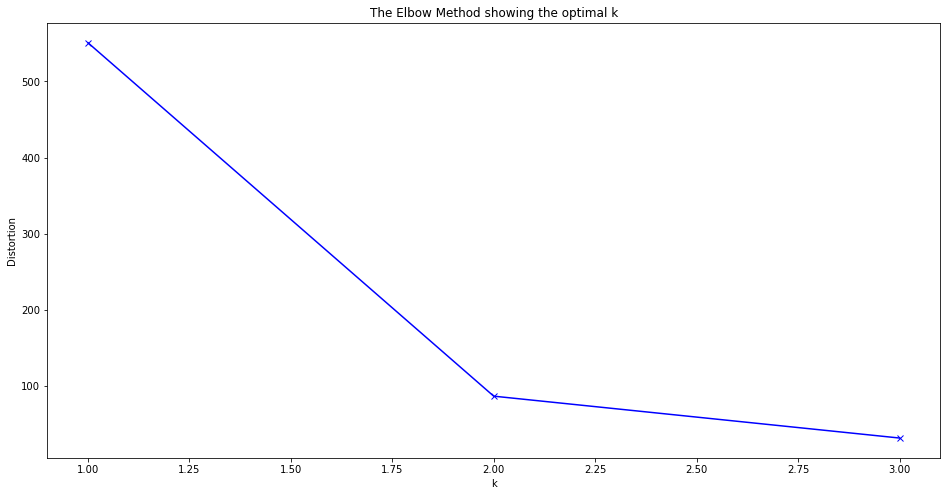

In [22]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()